In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [89]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [90]:
df.shape

(200, 5)

In [91]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [92]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

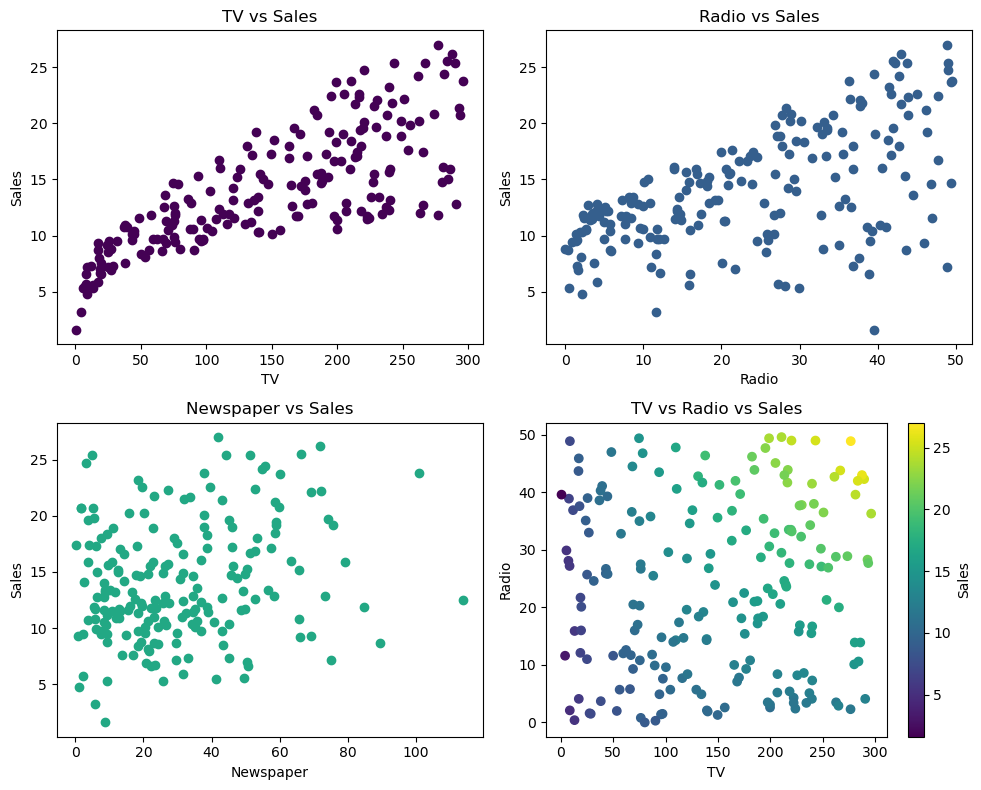

In [93]:
cmap = plt.cm.viridis
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].scatter(df['TV'], df['Sales'], c=[cmap(0)])
axs[0, 0].set_xlabel('TV')
axs[0, 0].set_ylabel('Sales')
axs[0, 0].set_title('TV vs Sales')

axs[0, 1].scatter(df['Radio'], df['Sales'], c=[cmap(0.3)])
axs[0, 1].set_xlabel('Radio')
axs[0, 1].set_ylabel('Sales')
axs[0, 1].set_title('Radio vs Sales')

axs[1, 0].scatter(df['Newspaper'], df['Sales'], c=[cmap(0.6)])
axs[1, 0].set_xlabel('Newspaper')
axs[1, 0].set_ylabel('Sales')
axs[1, 0].set_title('Newspaper vs Sales')

scatter = axs[1, 1].scatter(df['TV'], df['Radio'], c=df['Sales'], cmap=cmap)
axs[1, 1].set_xlabel('TV')
axs[1, 1].set_ylabel('Radio')
axs[1, 1].set_title('TV vs Radio vs Sales')
cbar = plt.colorbar(scatter)
cbar.set_label('Sales')

plt.tight_layout()
plt.show()


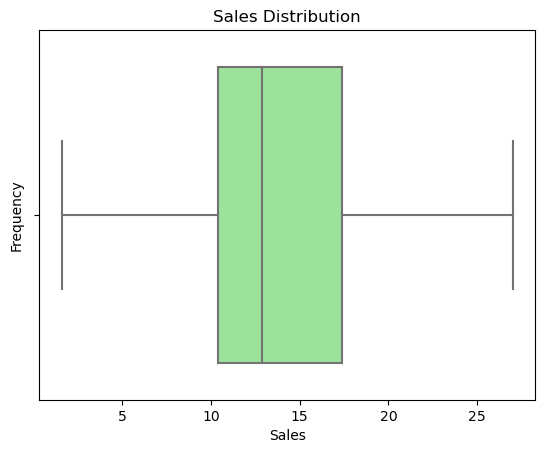

In [94]:
sns.boxplot(x=df['Sales'], color='lightgreen')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.show()

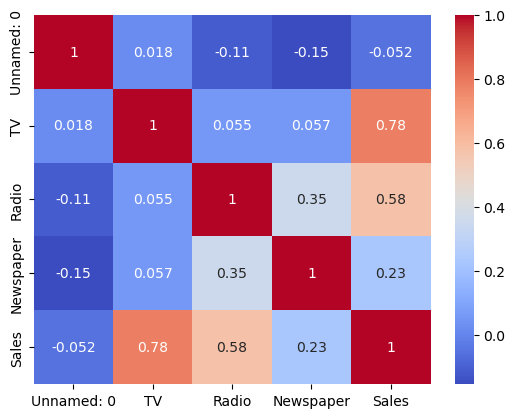

In [95]:
sns.heatmap(df.corr(), cmap="coolwarm", annot = True)
plt.show()

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 3.1740973539761046
Root Mean Squared Error: 1.7815996615334502


In [97]:
import statsmodels.api as sm
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           1.58e-96
Time:                        07:56:39   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [98]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [99]:
lr.params

const        2.979067
TV           0.044730
Radio        0.189195
Newspaper    0.002761
dtype: float64

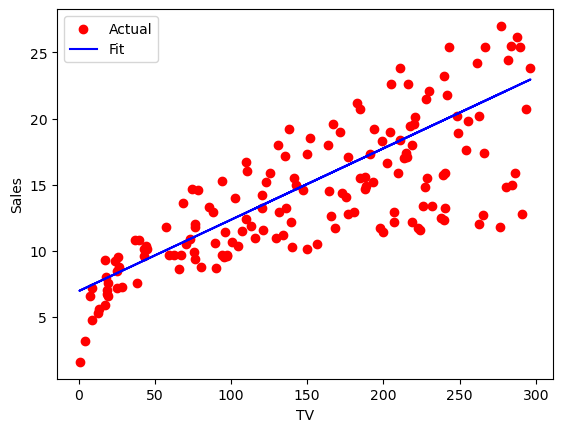

In [100]:
plt.scatter(X_train['TV'], y_train, color='red', label='Actual')
plt.plot(X_train['TV'], 6.948 + 0.054*X_train['TV'], 'b', label='Fit')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()


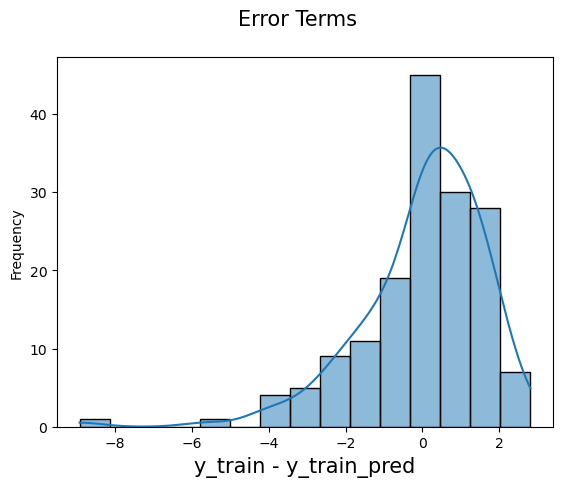

In [101]:
y_train_pred = lr.predict(X_train_sm)
res = y_train - y_train_pred
fig = plt.figure()
sns.histplot(res, bins=15, kde=True)
fig.suptitle('Error Terms', fontsize=15)  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize=15)  # X-label
plt.ylabel('Frequency')
plt.show()


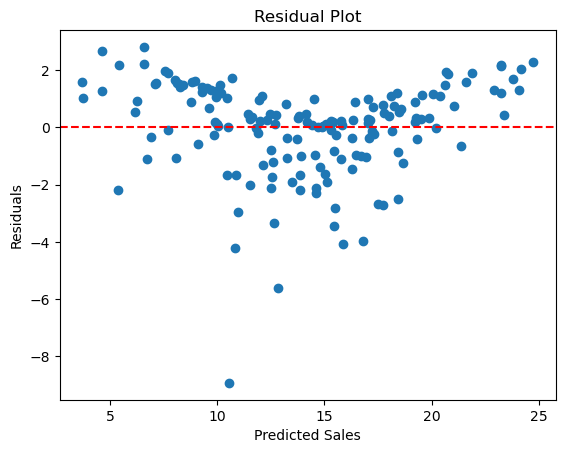

In [102]:
plt.scatter(y_train_pred, res)
plt.axhline(y=0, color='red', linestyle='--')  
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [103]:
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)
y_pred.head()


95     16.408024
15     20.889882
30     21.553843
158    10.608503
128    22.112373
dtype: float64

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [105]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.7815996615334504

In [106]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.899438024100912

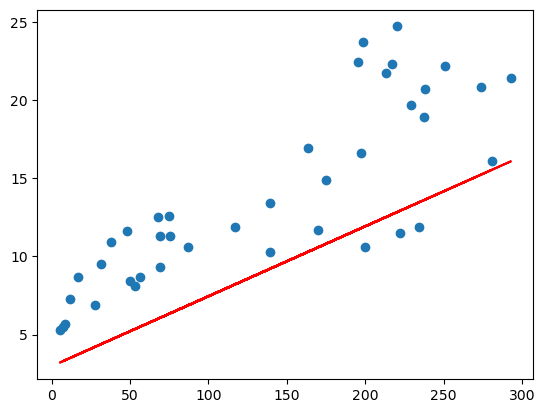

In [109]:
plt.scatter(X_test['TV'], y_test)
plt.plot(X_test['TV'], 2.979067 + 0.044730 * X_test['TV'], 'r')
plt.show()


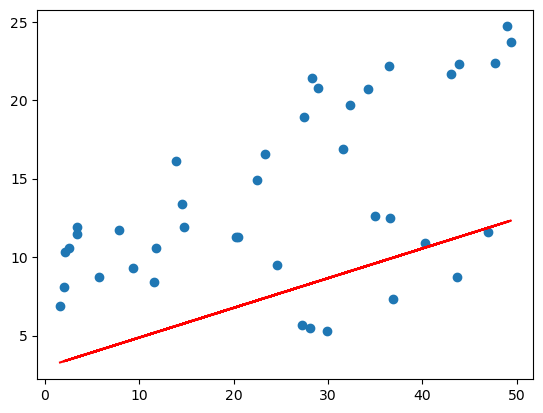

In [110]:
plt.scatter(X_test['Radio'], y_test)
plt.plot(X_test['Radio'], 2.979067 + 0.189195 * X_test['Radio'], 'r')
plt.show()